In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = load_digits(return_X_y=False, as_frame=False)

In [3]:
images = data['images']
targets = data["target"]
data = data['data']

Image is of : 0


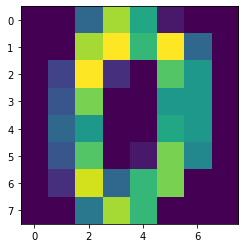

In [4]:
plt.imshow(images[0]), 
print("Image is of :", targets[0])

In [5]:
X, y = data, targets

In [6]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [0.5, 1, 1.5, 5],
            'kernel': ['rbf','linear']
        }
    },
    'rfc':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [60,80,100,120],
            'criterion': ['gini', 'entropy'],
            'max_features': ['sqrt', 'log2']
            
        }
    },
    'log_reg':{
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'penalty': ['l1', 'l2', 'elasticnet'],
            'C': [0.5, 1,5,10],
            'solver': ['newton-cg', 'liblinear', 'saga']
        }
    },
    'gnb_clf':{
        'model': GaussianNB(),
        'params': {
           'var_smoothing': [1e-8, 1e-9, 1e-10]
        }
    },
    'mnb_clf':{
        'model': MultinomialNB(),
        'params': {
            'alpha': [0, 0.5, 1]
        }
    },
    'dt_clf':{
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': [10,15,20, 50, 80]
        }
    }
}

In [8]:
scores = []
for model_name, model_params in model_params.items():
    clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, return_train_score=False)
    clf.fit(data, targets)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting a

,model,best_score,best_params
0,svm,0.947697,"{'C': 0.5, 'kernel': 'linear'}"
1,rfc,0.944927,"{'criterion': 'gini', 'max_features': 'log2', ..."
2,log_reg,0.928233,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}"
3,gnb_clf,0.819723,{'var_smoothing': 1e-08}
4,mnb_clf,0.870350,{'alpha': 0}
5,dt_clf,0.813045,"{'criterion': 'entropy', 'max_depth': 80}"


In [9]:
df.best_params[1]

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 120}